In [113]:
import requests
import bs4
import json
import datetime as dt
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
Lisbon_Properties = pd.read_csv(r'C:\Users\rgpoi\OneDrive\Ambiente de Trabalho\Ficheiros_Projeto_Python\Lisbon_Properties.csv', index_col=0)
Lisbon_Properties

,id,title,price,num_rooms,total_area,latitude,longitude,region,extras
0,0,"Apartamento T1 em Benfica, Lisboa",269.900 €,1 quarto,Área bruta 97 m²,"38,75171","-9,2009",Benfica,
1,1,"Apartamento T2 em Alvalade, Lisboa",430.000 €,2 quartos,Área bruta 90 m²,"38,7457392","-9,1425898",Alvalade,
2,2,"Apartamento T3 na Rua António Nobre, São Domin...",399.900 €,3 quartos,Área bruta 120 m²,"38,74657","-9,17989",São Domingos de Benfica,
3,3,"Apartamento T4+1 na Rua de São Paulo, Misericó...",1.650.000 €,4 quartos,Área útil 233 m²,"38,70794","-9,14468",Misericórdia,"Com elevador, Com garagem"
4,4,"Apartamento T1 em Praça de Luís de Camões, Mis...",690.000 €,1 quarto,Área bruta 93 m²,"38,71078","-9,14385",Misericórdia,Com garagem
...,...,...,...,...,...,...,...,...,...
1376,1376,Apartamento T2 na Rua do Vale de Santo António...,399.900 €,2 quartos,Área bruta 55 m²,"38,7177917","-9,1224923",São Vicente,
1377,1377,"Apartamento T4 em Arroios, Lisboa",385.000 €,4 quartos,Área bruta 90 m²,"38,72422","-9,1345992",Arroios,
1378,1378,"Apartamento T4 na Avenida Barbosa Du Bocage, A...",1.700.000 €,4 quartos,Área bruta 177 m²,"38,74006","-9,14737",Avenidas Novas,Com elevador
1379,1379,"Apartamento T1 em Estrada de Benfica, Benfica,...",275.000 €,1 quarto,Área bruta 70 m²,"38,75286","-9,20801",Benfica,


In [115]:
Lisbon_Properties = Lisbon_Properties[~Lisbon_Properties.drop('id', axis=1).duplicated()]

In [116]:
Lisbon_Properties['num_rooms'].value_counts()

num_rooms
2 quartos     426
1 quarto      311
3 quartos     264
4 quartos     136
5 quartos      29
9 quartos      13
7 quartos       6
6 quartos       6
10 quartos      2
8 quartos       1
11 quartos      1
Name: count, dtype: int64

In [117]:
Lisbon_Properties['total_area'].unique()

array(['Área bruta 97 m²', 'Área bruta 90 m²', 'Área bruta 120 m²',
       'Área útil 233 m²', 'Área bruta 93 m²', 'Área bruta 416 m²',
       'Área bruta 55 m²', 'Área bruta 234 m²', 'Área bruta 290 m²',
       'Área bruta 262 m²', 'Área bruta 336 m²', 'Área bruta 264 m²',
       'Área bruta 60 m²', 'Área bruta 874 m²', 'Área bruta 68 m²',
       'Área útil 88 m²', 'Área bruta 48 m²', 'Área bruta 110 m²',
       'Área bruta 102 m²', 'Área útil 142 m²', 'Área bruta 76 m²',
       'Área bruta 119 m²', 'Área bruta 160 m²', 'Área bruta 54 m²',
       'Área bruta 302 m²', 'Área bruta 44 m²', 'Área bruta 150 m²',
       'Área bruta 168 m²', 'Área bruta 70 m²', 'Área bruta 49 m²',
       'Área bruta 230 m²', 'Área bruta 191 m²', 'Área bruta 426 m²',
       'Área bruta 138 m²', 'Área útil 139 m²', 'Área bruta 198 m²',
       'Área bruta 85 m²', 'Área bruta 130 m²', 'Área bruta 180 m²',
       'Área bruta 67 m²', 'Área bruta 134 m²', 'Área bruta 286 m²',
       'Área bruta 77 m²', 'Área bruta 

In [118]:
Lisbon_Properties.head()

,id,title,price,num_rooms,total_area,latitude,longitude,region,extras
0,0,"Apartamento T1 em Benfica, Lisboa",269.900 €,1 quarto,Área bruta 97 m²,"38,75171","-9,2009",Benfica,
1,1,"Apartamento T2 em Alvalade, Lisboa",430.000 €,2 quartos,Área bruta 90 m²,"38,7457392","-9,1425898",Alvalade,
2,2,"Apartamento T3 na Rua António Nobre, São Domin...",399.900 €,3 quartos,Área bruta 120 m²,"38,74657","-9,17989",São Domingos de Benfica,
3,3,"Apartamento T4+1 na Rua de São Paulo, Misericó...",1.650.000 €,4 quartos,Área útil 233 m²,"38,70794","-9,14468",Misericórdia,"Com elevador, Com garagem"
4,4,"Apartamento T1 em Praça de Luís de Camões, Mis...",690.000 €,1 quarto,Área bruta 93 m²,"38,71078","-9,14385",Misericórdia,Com garagem


In [119]:
def extra_rooms(x):
    if '+' in x:
        return int(x.split('+')[1])
    else:
        return 0

def area(x):
    if 'Área' in x:
        return int(x.split()[2].replace('.',''))
    else:
        return 'Unknown'

def num_extras(x):
    if x.isspace():
        return 0
    elif ',' in x:
        return int(len(x.split(',')))
    else:
        return 1

In [120]:
Lisbon_Properties['Type'] = Lisbon_Properties['title'].apply(lambda x: x.split()[0])
Lisbon_Properties['Typology'] = Lisbon_Properties['title'].apply(lambda x: x.split()[1])
Lisbon_Properties['Extra_Rooms'] = Lisbon_Properties['Typology'].apply(extra_rooms)
Lisbon_Properties['Extra_Rooms_Flag'] = Lisbon_Properties['Extra_Rooms'].apply(lambda x: 1 if x > 0 else 0)
Lisbon_Properties['N_Rooms'] = Lisbon_Properties['num_rooms'].apply(lambda x: int(x.split()[0]))
Lisbon_Properties['Total_N_Rooms'] = Lisbon_Properties['N_Rooms'] + Lisbon_Properties['Extra_Rooms']
Lisbon_Properties['Price'] = Lisbon_Properties['price'].apply(lambda x: int(x.replace('.','').split()[0]))
Lisbon_Properties['Area_m2'] = Lisbon_Properties['total_area'].apply(area)
Lisbon_Properties['N_Extras'] = Lisbon_Properties['extras'].apply(num_extras)
Lisbon_Properties['Extras_Flag'] = Lisbon_Properties['N_Extras'].apply(lambda x: 1 if x > 0 else 0)
Lisbon_Properties['Latitude'] = Lisbon_Properties['latitude'].apply(lambda x: float(x.replace(',','.')))
Lisbon_Properties['Longitude'] = Lisbon_Properties['longitude'].apply(lambda x: float(x.replace(',','.')))
Lisbon_Properties.rename(columns={'region':'Region'}, inplace=True)

In [121]:
extras_df = Lisbon_Properties['extras'].str.split(',', expand=True)
extras_df

,0,1,2,3,4
0,,None,None,None,None
1,,None,None,None,None
2,,None,None,None,None
3,Com elevador,Com garagem,None,None,None
4,Com garagem,None,None,None,None
...,...,...,...,...,...
1375,,None,None,None,None
1377,,None,None,None,None
1378,Com elevador,None,None,None,None
1379,,None,None,None,None


In [122]:
extras_df = Lisbon_Properties['extras'].str.split(',', expand=True)

extras = []
unique_extras = []

for x in [0,1,2,3,4]:
    extras.append(list(extras_df[x].unique()))

for ext in extras:
    unique_extras += ext

unique_extras = set(unique_extras)
unique_extras = {extra.strip() for extra in unique_extras if extra is not None and extra.strip()}

In [123]:
for feature in unique_extras:
    Lisbon_Properties[feature] = Lisbon_Properties['extras'].apply(lambda x: int(feature in x))

In [124]:
#columns_to_drop = ['title', 'price', 'num_rooms', 'total_area', 'latitude', 'longitude', 'Typology','extras']
#Lisbon_Properties = Lisbon_Properties.drop(columns_to_drop, axis=1)

In [125]:
region_dummies = pd.get_dummies(Lisbon_Properties['Region'],dtype=int)
type_dummies = pd.get_dummies(Lisbon_Properties['Type'],dtype=int)

In [126]:
Lisbon_Properties = pd.concat([Lisbon_Properties, region_dummies, type_dummies], axis=1)

In [127]:
Lisbon_Properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1195 entries, 0 to 1380
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1195 non-null   int64  
 1   title                    1195 non-null   object 
 2   price                    1195 non-null   object 
 3   num_rooms                1195 non-null   object 
 4   total_area               1195 non-null   object 
 5   latitude                 1195 non-null   object 
 6   longitude                1195 non-null   object 
 7   Region                   1195 non-null   object 
 8   extras                   1195 non-null   object 
 9   Type                     1195 non-null   object 
 10  Typology                 1195 non-null   object 
 11  Extra_Rooms              1195 non-null   int64  
 12  Extra_Rooms_Flag         1195 non-null   int64  
 13  N_Rooms                  1195 non-null   int64  
 14  Total_N_Rooms            1195

In [128]:
selected_columns = ['id', 'N_Rooms', 'Price', 'Area_m2', 'Region', 'Typology', 'Type']

# Create a new DataFrame with only the selected columns
data = Lisbon_Properties[selected_columns].copy()

In [129]:
data.set_index('id', inplace = True)

In [130]:
data

,N_Rooms,Price,Area_m2,Region,Typology,Type
id,,,,,,
0,1,269900,97,Benfica,T1,Apartamento
1,2,430000,90,Alvalade,T2,Apartamento
2,3,399900,120,São Domingos de Benfica,T3,Apartamento
3,4,1650000,233,Misericórdia,T4+1,Apartamento
4,1,690000,93,Misericórdia,T1,Apartamento
...,...,...,...,...,...,...
1375,2,349900,70,São Domingos de Benfica,T2,Apartamento
1377,4,385000,90,Arroios,T4,Apartamento
1378,4,1700000,177,Avenidas Novas,T4,Apartamento


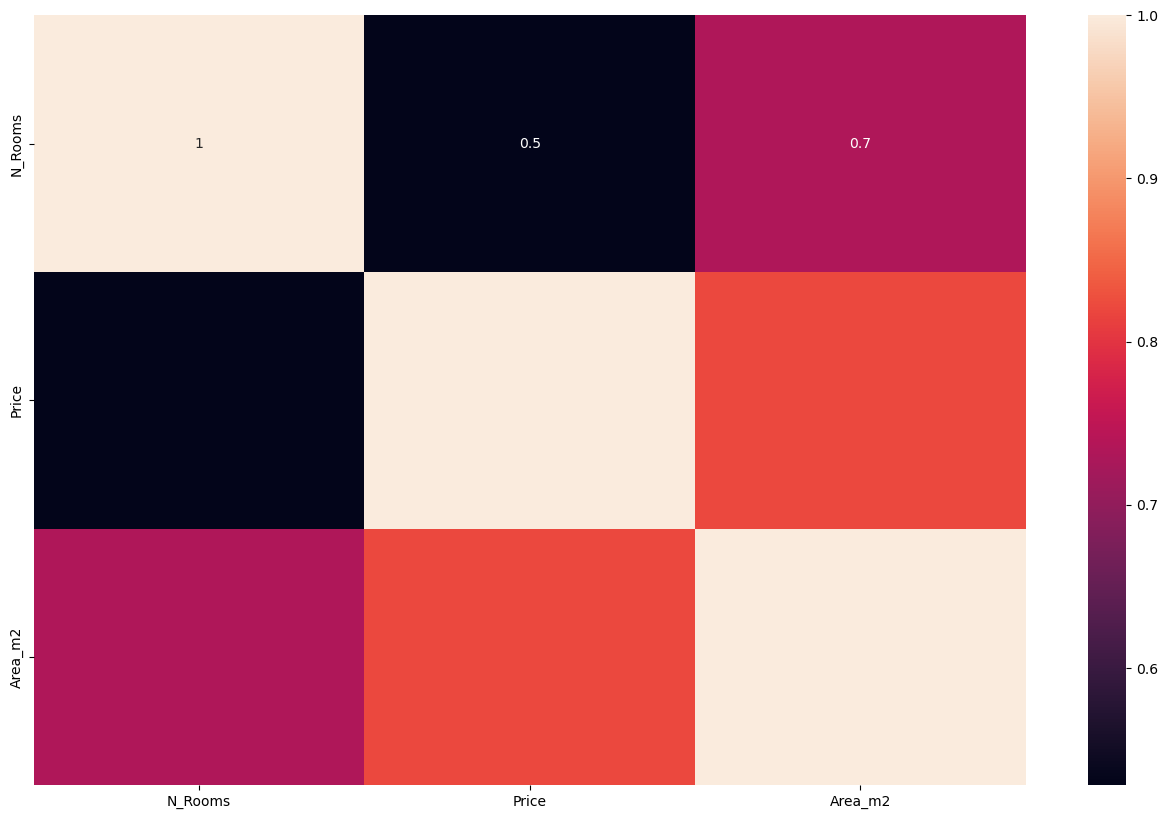

In [131]:
# Drop rows with non-numeric values
# create a new dataframe with just number on it - excluded the categorical values
# Pearson and do not work with binary variables
data_numeric = data.select_dtypes(include='number')

# Drop binary variables
# drop will work for row and columns - when axis = 0 (default) deletes lines
data_spearman = data_numeric

# Calculate correlation matrix
# method corr - correlaçao - pearson é o defult
# heatmap- annot = 1 we want to see the number, fmt we want to see the first significant figure
data_corr = data_spearman.corr(method='spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(data_corr, annot=True, fmt = '.1g')

plt.savefig('correlation_heatmap.png', dpi=200)

In [132]:
data_numeric.corr()

,N_Rooms,Price,Area_m2
N_Rooms,1.00,0.52,0.51
Price,0.52,1.00,0.72
Area_m2,0.51,0.72,1.00


In [133]:
data['Sqr_meter'] = data['Price']/data['Area_m2']
data

,N_Rooms,Price,Area_m2,Region,Typology,Type,Sqr_meter
id,,,,,,,
0,1,269900,97,Benfica,T1,Apartamento,2782.47
1,2,430000,90,Alvalade,T2,Apartamento,4777.78
2,3,399900,120,São Domingos de Benfica,T3,Apartamento,3332.50
3,4,1650000,233,Misericórdia,T4+1,Apartamento,7081.55
4,1,690000,93,Misericórdia,T1,Apartamento,7419.35
...,...,...,...,...,...,...,...
1375,2,349900,70,São Domingos de Benfica,T2,Apartamento,4998.57
1377,4,385000,90,Arroios,T4,Apartamento,4277.78
1378,4,1700000,177,Avenidas Novas,T4,Apartamento,9604.52


In [134]:
# Calculate the average value per region
average_per_region = data.groupby('Region')['Sqr_meter'].mean()

print(average_per_region)

Region
Ajuda                     6330.18
Alcântara                 6164.78
Alvalade                  6486.42
Areeiro                   5532.27
Arroios                   5579.52
Avenidas Novas            7869.24
Beato                     3937.88
Belém                     7230.35
Benfica                   5073.40
Campo de Ourique          6032.93
Campolide                 7446.01
Carnide                   5000.85
Estrela                   7936.65
Lumiar                    5953.18
Marvila                   4693.19
Misericórdia              7124.97
Olivais                   4198.60
Parque das Nações         9405.58
Penha de França           4896.34
Santa Clara               2446.01
Santa Maria Maior         7355.28
Santo António             8514.56
São Domingos de Benfica   5480.70
São Vicente               6031.34
Name: Sqr_meter, dtype: float64


In [135]:
average_per_type = data.groupby('Type')['Price'].agg(['mean', 'count'])

pd.options.display.float_format = '{:.2f}'.format

print(average_per_type)

                  mean  count
Type                         
Apartamento  758616.10   1118
Casa         355000.00      2
Duplex       963034.78     23
Flat         510000.00      1
Loft         910000.00      2
Moradia     1716256.10     41
Palacete    5800000.00      1
Penthouse   1746666.67      6
Quinta      7500000.00      1


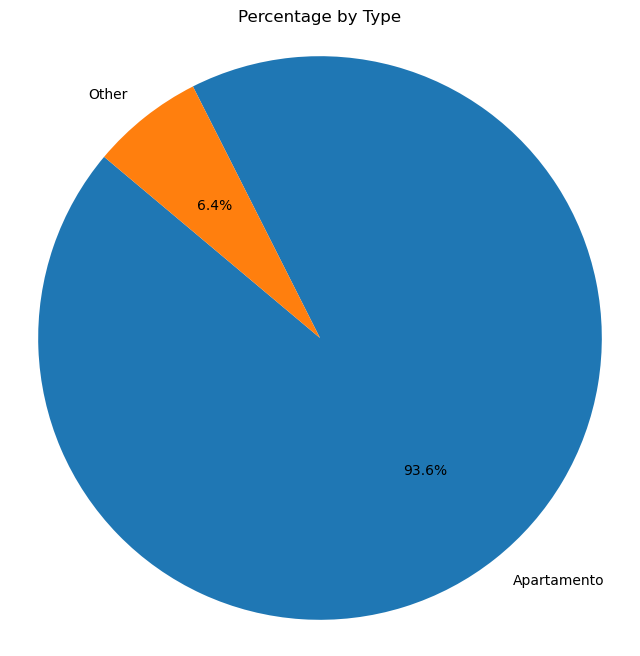

In [136]:
import matplotlib.pyplot as plt

average_per_type['Type'] = average_per_type.index
average_per_type['Grouped_Type'] = average_per_type['Type'].apply(lambda x: x if x == 'Apartamento' else 'Other')
grouped_counts = average_per_type.groupby('Grouped_Type')['count'].sum()

plt.figure(figsize=(8, 8))  # Set the figure size

labels = grouped_counts.index
sizes = grouped_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')


plt.title('Percentage by Type')

plt.savefig('type', dpi=200, bbox_inches='tight')

plt.show()

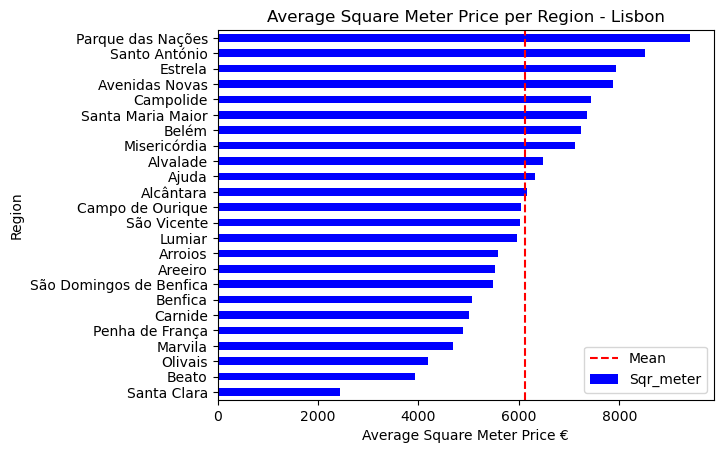

In [137]:
import matplotlib.pyplot as plt

average_per_region_sorted = average_per_region.sort_values(ascending=True)

average_per_region_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Square Meter Price €')
plt.ylabel('Region')
plt.title('Average Square Meter Price per Region - Lisbon')
plt.legend()

plt.savefig('average_price_sqr_region.png', dpi=200, bbox_inches='tight')
plt.show()

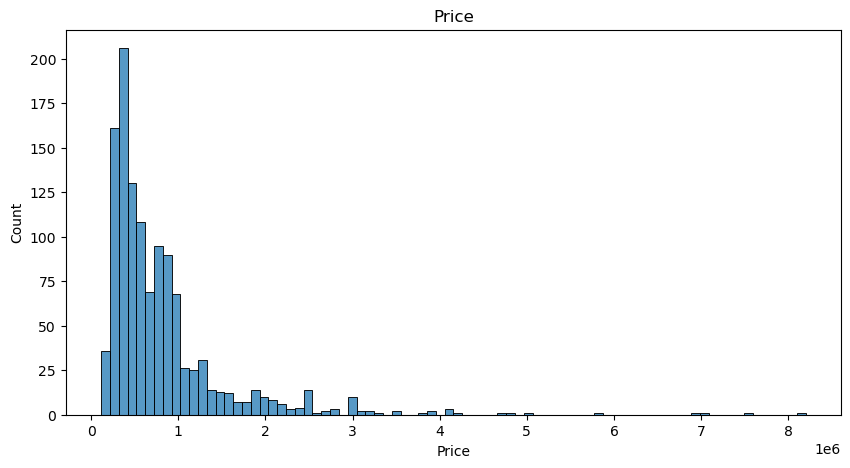

In [138]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.histplot(data=data, x="Price")
#sns.histplot(data=df_sample, x="total", stat="probability") # in relative frequency
plt.title("Price")
plt.show()

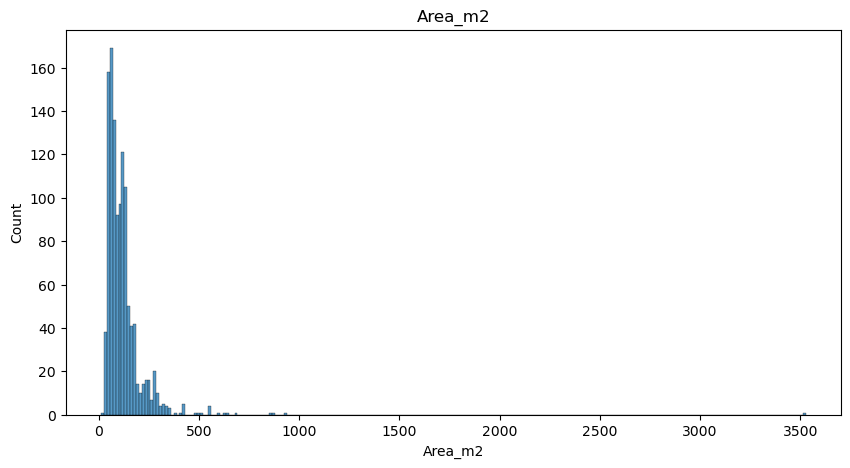

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (10,5))
sns.histplot(data=data, x="Area_m2")
#sns.histplot(data=df_sample, x="total", stat="probability") # in relative frequency
plt.title("Area_m2")
plt.show()

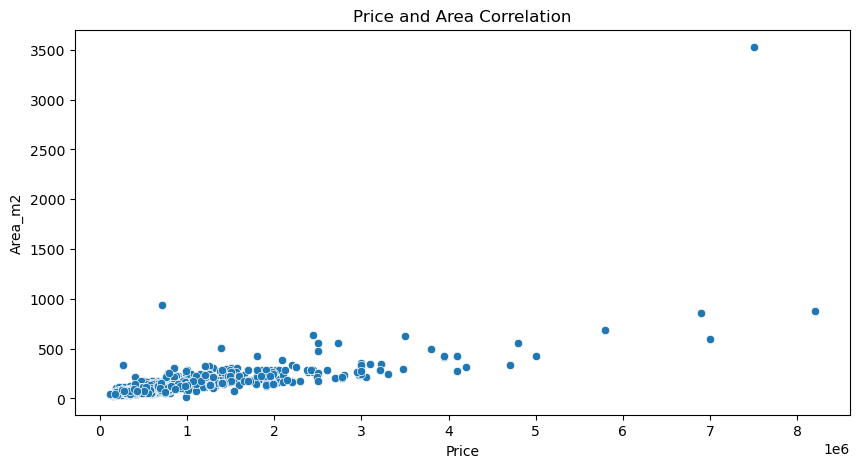

In [140]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x="Price", y="Area_m2")
plt.title('Price and Area Correlation')
plt.show()

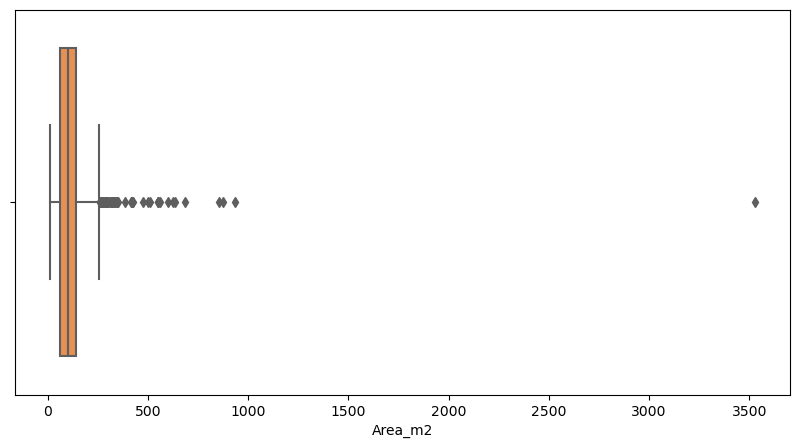

In [141]:
plt.figure(figsize = (10,5))
sns.boxplot(data=data, x="Area_m2", palette="Oranges")
plt.ylabel("")
plt.show()

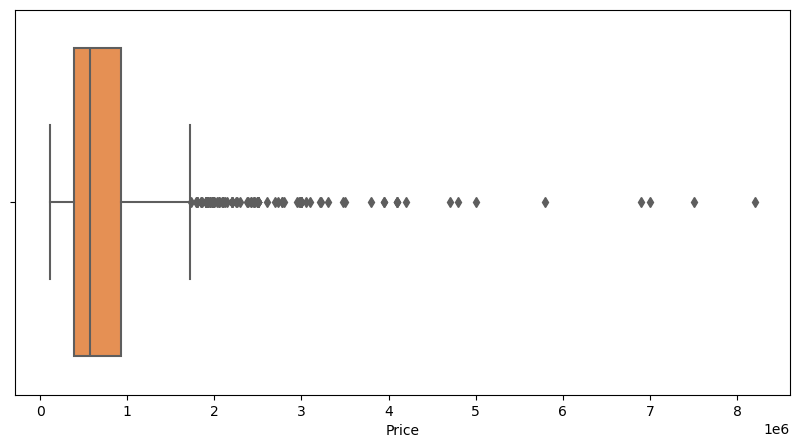

In [142]:
plt.figure(figsize = (10,5))
sns.boxplot(data=data, x="Price", palette="Oranges")
plt.ylabel("")
plt.show()

<Axes: xlabel='N_Rooms', ylabel='count'>

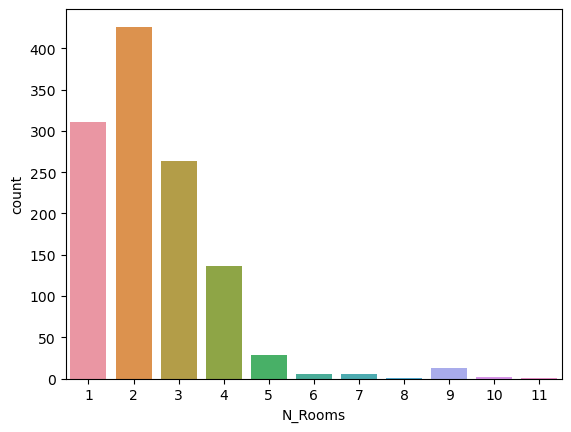

In [143]:
sns.countplot(x= 'N_Rooms', data = data)

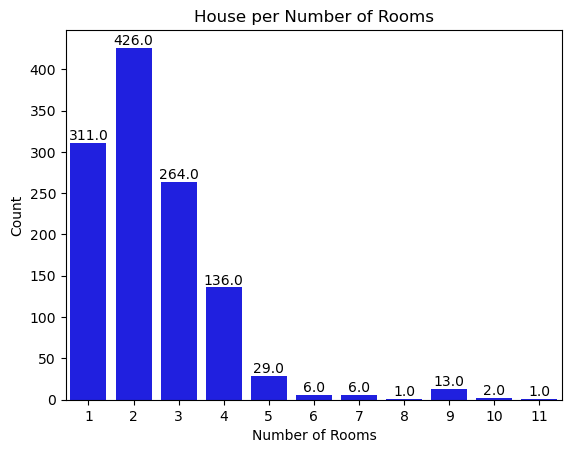

In [144]:


ax = sns.countplot(x='N_Rooms', data=data, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

total_count = data['N_Rooms'].count()

plt.title(f'House per Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

plt.savefig('rooms_count.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

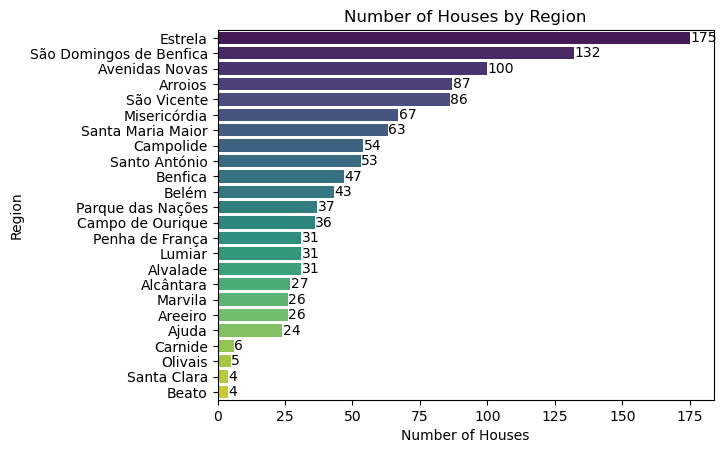

In [145]:
import matplotlib.pyplot as plt

region_counts = data['Region'].value_counts()

sorted_regions = region_counts.index.tolist()

sns.countplot(y='Region', data=data, order=sorted_regions, palette='viridis')

for i, count in enumerate(region_counts[sorted_regions]):
    plt.text(count + 0.1, i, str(count), va='center')

plt.xlabel('Number of Houses')
plt.ylabel('Region')
plt.title('Number of Houses by Region')

plt.savefig('houses_region.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

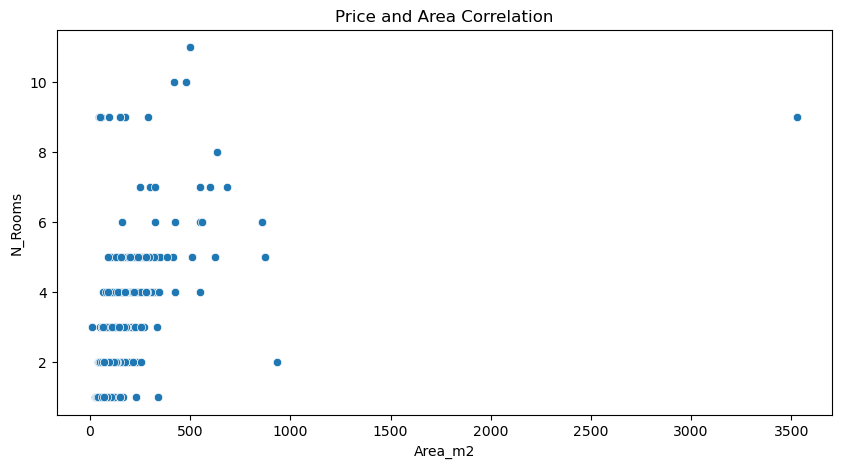

In [146]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x="Area_m2", y="N_Rooms")
plt.title('Price and Area Correlation')
plt.show()

<Axes: xlabel='Area_m2', ylabel='Count'>

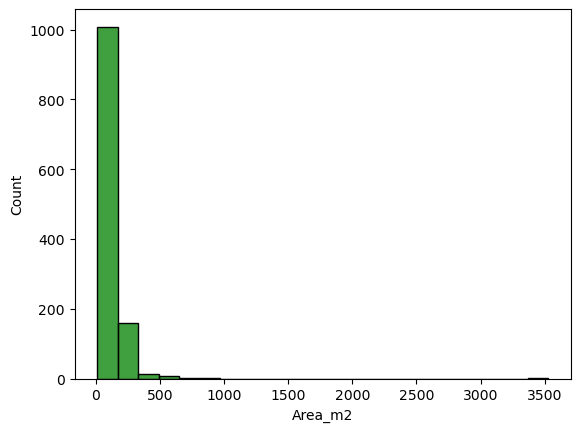

In [147]:
sns.histplot(data = data, x = 'Area_m2', color="g", bins='rice')

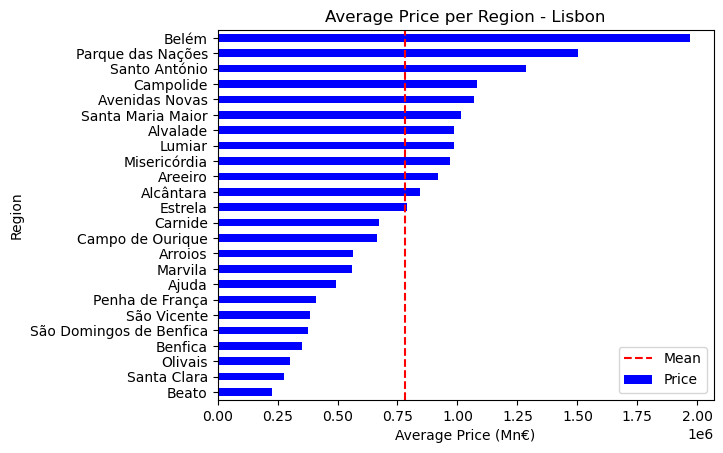

In [148]:
average_per_region_price = data.groupby('Region')['Price'].mean()

average_per_region_price_sorted = average_per_region_price.sort_values(ascending=True)

average_per_region_price_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_price_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Price (Mn€)')
plt.ylabel('Region')
plt.title('Average Price per Region - Lisbon')
plt.legend()

plt.savefig('average_price_region.png', dpi=200, bbox_inches='tight')
plt.show()

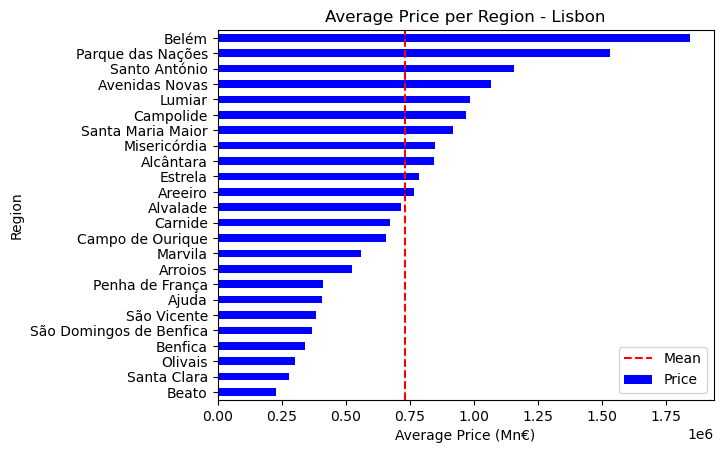

In [149]:
apartamento_data = data[data['Type'] == 'Apartamento']

average_per_region_apartamento = apartamento_data.groupby('Region')['Price'].mean()

average_per_region_sorted = average_per_region_apartamento.sort_values(ascending=True)

average_per_region_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Price (Mn€)')
plt.ylabel('Region')
plt.title('Average Price per Region - Lisbon')
plt.legend()
plt.show()

In [150]:
apartamento_data

,N_Rooms,Price,Area_m2,Region,Typology,Type,Sqr_meter
id,,,,,,,
0,1,269900,97,Benfica,T1,Apartamento,2782.47
1,2,430000,90,Alvalade,T2,Apartamento,4777.78
2,3,399900,120,São Domingos de Benfica,T3,Apartamento,3332.50
3,4,1650000,233,Misericórdia,T4+1,Apartamento,7081.55
4,1,690000,93,Misericórdia,T1,Apartamento,7419.35
...,...,...,...,...,...,...,...
1375,2,349900,70,São Domingos de Benfica,T2,Apartamento,4998.57
1377,4,385000,90,Arroios,T4,Apartamento,4277.78
1378,4,1700000,177,Avenidas Novas,T4,Apartamento,9604.52


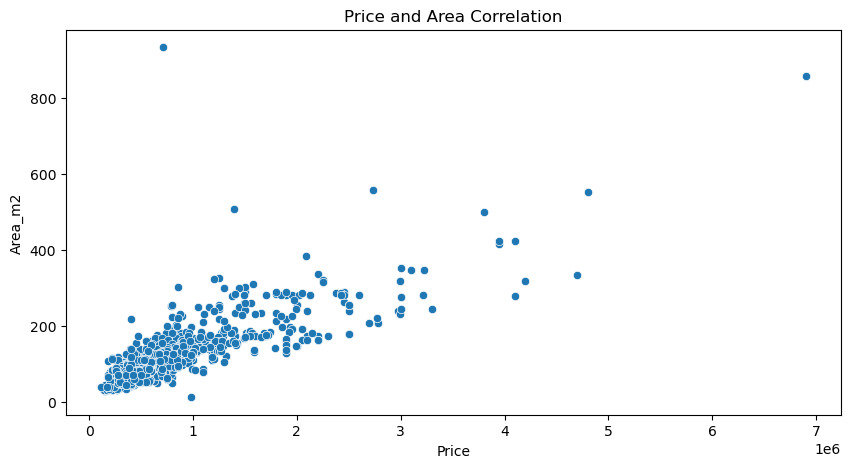

In [151]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=apartamento_data, x="Price", y="Area_m2")
plt.title('Price and Area Correlation')
plt.show()

<Axes: xlabel='Area_m2', ylabel='Count'>

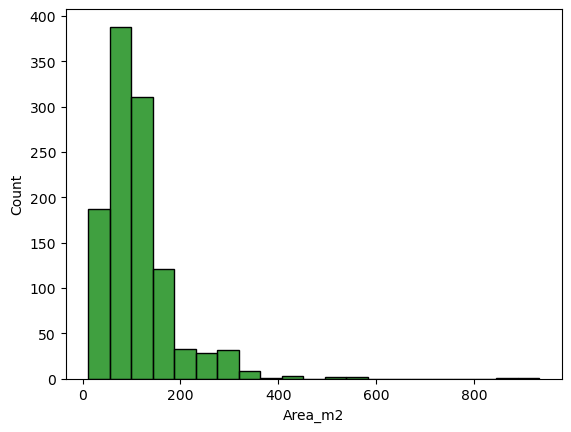

In [152]:
sns.histplot(data = apartamento_data, x = 'Area_m2', color="g", bins='rice')

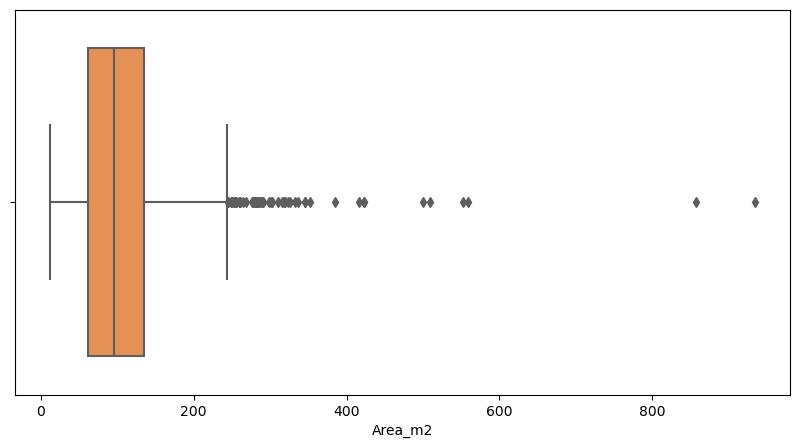

In [153]:
plt.figure(figsize = (10,5))
sns.boxplot(data=apartamento_data, x="Area_m2", palette="Oranges")
plt.ylabel("")
plt.show()

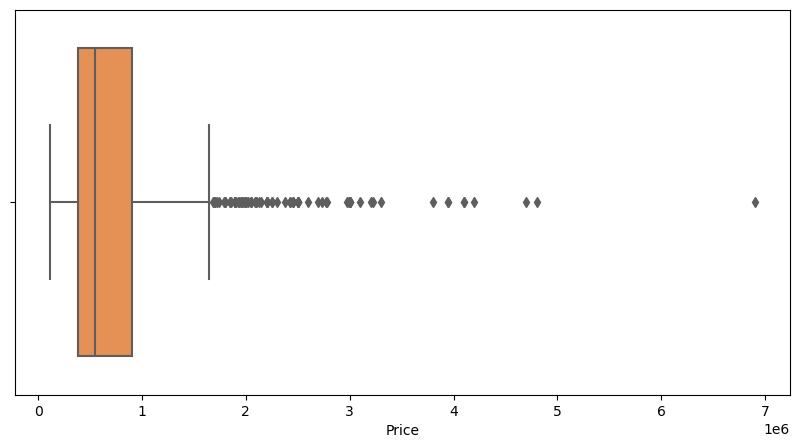

In [154]:
plt.figure(figsize = (10,5))
sns.boxplot(data=apartamento_data, x="Price", palette="Oranges")
plt.ylabel("")
plt.show()

In [155]:
selected_columns_carac = ['id', 'Último andar', 'De luxo', 'Com elevador', 'Piscina', 'Com garagem', 'Vista para mar', 'Price', 'Region']

# Create a new DataFrame with only the selected columns
data_carac = Lisbon_Properties[selected_columns_carac].copy()
data_carac

,id,Último andar,De luxo,Com elevador,Piscina,Com garagem,Vista para mar,Price,Region
0,0,0,0,0,0,0,0,269900,Benfica
1,1,0,0,0,0,0,0,430000,Alvalade
2,2,0,0,0,0,0,0,399900,São Domingos de Benfica
3,3,0,0,1,0,1,0,1650000,Misericórdia
4,4,0,0,0,0,1,0,690000,Misericórdia
...,...,...,...,...,...,...,...,...,...
1375,1375,0,0,0,0,0,0,349900,São Domingos de Benfica
1377,1377,0,0,0,0,0,0,385000,Arroios
1378,1378,0,0,1,0,0,0,1700000,Avenidas Novas
1379,1379,0,0,0,0,0,0,275000,Benfica


In [156]:
data_carac.set_index('id', inplace = True)
data_carac

,Último andar,De luxo,Com elevador,Piscina,Com garagem,Vista para mar,Price,Region
id,,,,,,,,
0,0,0,0,0,0,0,269900,Benfica
1,0,0,0,0,0,0,430000,Alvalade
2,0,0,0,0,0,0,399900,São Domingos de Benfica
3,0,0,1,0,1,0,1650000,Misericórdia
4,0,0,0,0,1,0,690000,Misericórdia
...,...,...,...,...,...,...,...,...
1375,0,0,0,0,0,0,349900,São Domingos de Benfica
1377,0,0,0,0,0,0,385000,Arroios
1378,0,0,1,0,0,0,1700000,Avenidas Novas


In [157]:
data_carac.groupby('Com elevador')['Price'].mean()

Com elevador
0   656579.05
1   959322.65
Name: Price, dtype: float64

In [158]:
data_carac.groupby('Com elevador').count()

,Último andar,De luxo,Piscina,Com garagem,Vista para mar,Price,Region
Com elevador,,,,,,,
0,591,591,591,591,591,591,591
1,604,604,604,604,604,604,604


In [159]:
data_carac.groupby('Piscina')['Price'].mean()

Piscina
0    781810.51
1   1186756.10
Name: Price, dtype: float64

In [160]:
data_carac.groupby('Piscina').count()

,Último andar,De luxo,Com elevador,Com garagem,Vista para mar,Price,Region
Piscina,,,,,,,
0,1113,1113,1113,1113,1113,1113,1113
1,82,82,82,82,82,82,82


In [161]:
data_carac.groupby('Com garagem')['Price'].mean()

Com garagem
0    662038.25
1   1201284.10
Name: Price, dtype: float64

In [162]:
data_carac.groupby('Vista para mar')['Price'].mean()

Vista para mar
0    795984.81
1   1752882.35
Name: Price, dtype: float64

In [163]:
data_carac.groupby('Vista para mar').count()

,Último andar,De luxo,Com elevador,Piscina,Com garagem,Price,Region
Vista para mar,,,,,,,
0,1178,1178,1178,1178,1178,1178,1178
1,17,17,17,17,17,17,17


In [164]:
average_price_by_elevador = data_carac.groupby(['Com elevador'])['Price'].mean()
average_price_by_elevador

Com elevador
0   656579.05
1   959322.65
Name: Price, dtype: float64

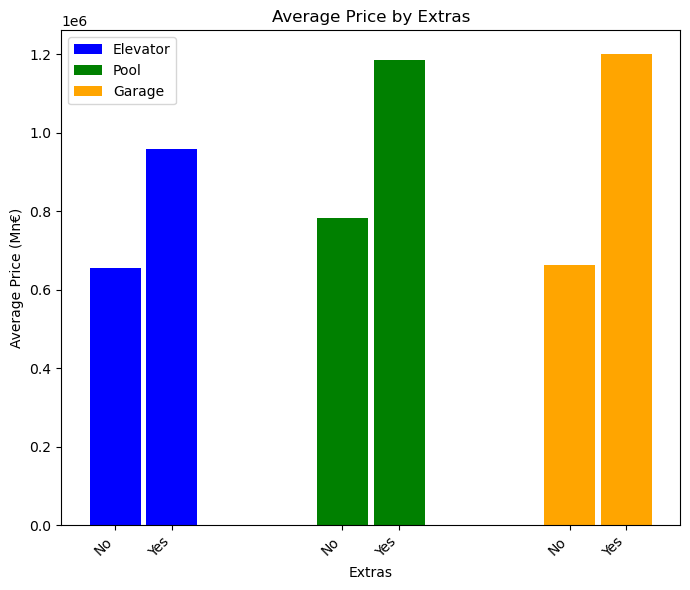

In [165]:
# Filter data for when the first boolean variable is 0 and 1
var1_0_price = data_carac[data_carac['Com elevador'] == 0]['Price'].mean()
var1_1_price = data_carac[data_carac['Com elevador'] == 1]['Price'].mean()

# Filter data for when the second boolean variable is 0 and 1
var2_0_price = data_carac[data_carac['Piscina'] == 0]['Price'].mean()
var2_1_price = data_carac[data_carac['Piscina'] == 1]['Price'].mean()

# Filter data for when the third boolean variable is 0 and 1
var3_0_price = data_carac[data_carac['Com garagem'] == 0]['Price'].mean()
var3_1_price = data_carac[data_carac['Com garagem'] == 1]['Price'].mean()

# Plot the bar graph
plt.figure(figsize=(7, 6))
bar_width = 0.45  # Width of each bar
index = [1, 1.5, 3, 3.5, 5, 5.5]  # Index positions for the bars

bars = plt.bar(index[:2], [var1_0_price, var1_1_price], bar_width, label='Elevator', color=['blue', 'blue'])
plt.bar(index[2:4], [var2_0_price, var2_1_price], bar_width, label='Pool', color=['green', 'green'])
plt.bar(index[4:6], [var3_0_price, var3_1_price], bar_width, label='Garage', color=['orange', 'orange'])

plt.xlabel('Extras')
plt.ylabel('Average Price (Mn€)')
plt.title('Average Price by Extras')
plt.xticks(rotation=45, ha='right')
plt.xticks([1, 1.5, 3, 3.5, 5, 5.5], ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'])  # Set x-axis tick positions and labels
plt.legend()


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

